In [76]:
import kwant
import matplotlib.pyplot as plt
import numpy as np
import dask.bag as db
from dask_quantumtinkerer import Cluster, cluster_options
import itertools as it
import pickle
import os
import sympy as sp
from scipy.signal import peak_widths
from matplotlib import cm
import matplotlib as mpl

import ccode.finite_system as tj
import ccode.tools as tl
import ccode.solvers as sl

import ccode.plotting as pt

%matplotlib inline

mpl.rcParams.update({'font.size': 16})

In [4]:
a = 10e-9

In [11]:
path = '../data/cavities'
#os.system('mkdir '+path)

# Triangle with different lead positions

In [25]:
area = 800*a**2
w = 7*a
theta = 1/4
geometry = {
    "l": 10*a,
    "w": w,
    "a": a,
    "side": 'down',
    "shape": 'triangle',
    "A": area,
    "angle": np.pi*theta
}

In [26]:
center = np.sqrt(np.abs(area/np.tan(theta*np.pi)))/2
geometry.update(centers=[center, -center])
trijunction, f_params, _ = tj.finite_system(**geometry)
trijunction = trijunction.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


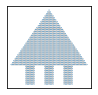

In [27]:
fig, axes = plt.subplots(figsize=(1.5, 1.5))
kwant.plot(trijunction, ax=axes)
axes.set_yticklabels([])
axes.set_xticklabels([])
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none')
plt.savefig(path+'/triangle_1.pdf')

In [21]:
area = 800*a**2
w = 7*a
theta = 1/4
geometry = {
    "l": 10*a,
    "w": w,
    "a": a,
    "side": 'up',
    "shape": 'triangle',
    "A": area,
    "angle": np.pi*theta
}

In [22]:
center = np.sqrt(np.abs(area/np.tan(theta*np.pi)))/2
geometry.update(centers=[center, -center])
trijunction, f_params, _ = tj.finite_system(**geometry)
trijunction = trijunction.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


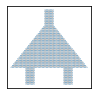

In [24]:
fig, axes = plt.subplots(figsize=(1.5, 1.5))
kwant.plot(trijunction, ax=axes)
axes.set_yticklabels([])
axes.set_xticklabels([])
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none')
plt.savefig(path+'/triangle_2.pdf')

In [43]:
area = 1400*a**2
theta = 1/4
geometry = {
    "L": 20*a,
    "w": 7*a,
    "side": 'up',
    "area": area,
    "angle": theta*np.pi
}

In [44]:
trijunction, f_params = tj.inverted_triangle_junction(**geometry)

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


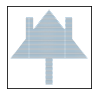

In [45]:
fig, axes = plt.subplots(figsize=(1.5, 1.5))
kwant.plot(trijunction, ax=axes)
axes.set_yticklabels([])
axes.set_xticklabels([])
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none')
plt.savefig(path+'/triangle_3.pdf')

In [39]:
area = 1400*a**2
theta = 1/4
geometry = {
    "L": 20*a,
    "w": 7*a,
    "side": 'down',
    "area": area,
    "angle": theta*np.pi
}

In [40]:
trijunction, f_params = tj.inverted_triangle_junction(**geometry)

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


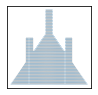

In [42]:
fig, axes = plt.subplots(figsize=(1.5, 1.5))
kwant.plot(trijunction, ax=axes)
axes.set_yticklabels([])
axes.set_xticklabels([])
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none')
plt.savefig(path+'/triangle_4.pdf')

# Half ring cavity

## Set up parameters

In [127]:
geometry = {
    "l": 5*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'ring',
    "R": 50*a,
    "r": 35*a
}

In [128]:
ring, f_params, _ = tj.finite_system(**geometry)
ring = ring.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


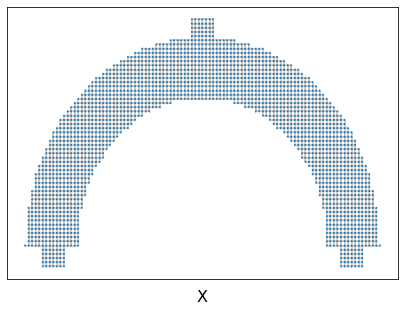

In [156]:
fig, ax = plt.subplots(figsize=(7, 5))
kwant.plot(ring, ax=ax)
ax.set_xlabel('X')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/ring.pdf')

In [259]:
eigen = sl.solver(geometries=[[trijunction, f_params]], n=20, key='mu_qd', eigenvecs=True)


def wrap(args):
    return eigen(*args)

In [260]:
params = sl.finite_coupling_parameters(index=0)[0]
params.update(mus_nw=[-2, -2, -2])

In [261]:
arg = [0, -1e-3, params]
evals, evecs = wrap(arg)

In [262]:
density = kwant.operator.Density(trijunction, np.eye(4))

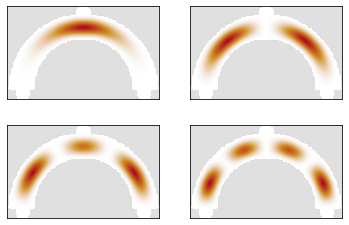

In [263]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 4))
#fig.tight_layout(w_pad=1, h_pad=2)
i = 0
for axes in ax.flatten():
    kwant.plotter.density(trijunction, density(evecs[9-i]), ax=axes);
    i += 1
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.xaxis.set_ticks_position('none') 
    axes.yaxis.set_ticks_position('none') 
plt.savefig(path+'/ring_wfs.pdf')

# Y

In [179]:
angle = np.pi*0.25
area = 600*a**2
geometry = {
    "l": 20*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'y',
    "angle": angle,
    "radius": 0*a,
    "w_v": 13*a,
    "A": area
}

In [180]:
y, f_params, _ = tj.finite_system(**geometry)
y = y.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


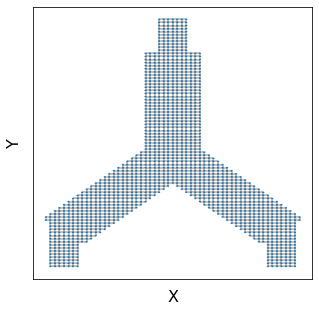

In [181]:
fig, ax = plt.subplots(figsize=(5, 5))
kwant.plot(y, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/y.pdf')

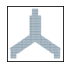

In [183]:
fig, ax = plt.subplots(figsize=(1, 1))
kwant.plot(y, ax=ax)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/y_mini.pdf')

In [235]:
eigen = sl.solver(geometries=[[trijunction, f_params]], n=20, key='mu_qd', eigenvecs=True)


def wrap(args):
    return eigen(*args)

In [236]:
params = sl.finite_coupling_parameters(index=0)[0]
params.update(mus_nw=[-2, -2, -2])

In [237]:
arg = [0, -1e-3, params]
evals, evecs = wrap(arg)

In [238]:
density = kwant.operator.Density(trijunction, np.eye(4))

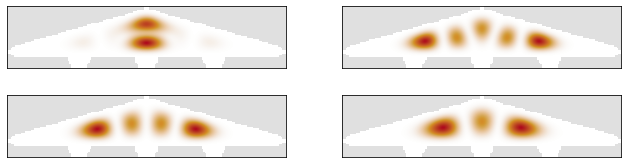

In [239]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(11, 3))
#fig.tight_layout(w_pad=1, h_pad=2)
i = 0
for axes in ax.flatten():
    kwant.plotter.density(trijunction, density(evecs[15-i]), ax=axes);
    i += 1
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.xaxis.set_ticks_position('none') 
    axes.yaxis.set_ticks_position('none') 
plt.savefig(path+'/triangle_wfs.pdf') 

# Triangle

In [166]:
area = 1400*a**2
w = 7*a
theta = 0.25
geometry = {
    "l": 5*a,
    "w": w,
    "a": a,
    "side": 'down',
    "shape": 'triangle',
    "A": area,
    "angle": np.pi*theta
}

In [167]:
center = np.sqrt(np.abs(area/np.tan(theta*np.pi)))/2
geometry.update(centers=[center, -center])
trijunction, f_params, _ = tj.finite_system(**geometry)
trijunction = trijunction.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


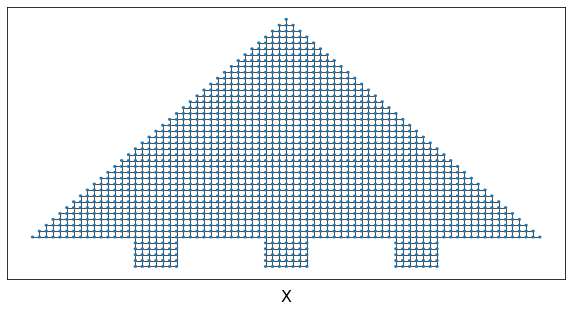

In [168]:
fig, ax = plt.subplots(figsize=(10, 5))
kwant.plot(trijunction, ax=ax)
ax.set_xlabel('X')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/triangle.pdf')

In [235]:
eigen = sl.solver(geometries=[[trijunction, f_params]], n=20, key='mu_qd', eigenvecs=True)


def wrap(args):
    return eigen(*args)

In [236]:
params = sl.finite_coupling_parameters(index=0)[0]
params.update(mus_nw=[-2, -2, -2])

In [237]:
arg = [0, -1e-3, params]
evals, evecs = wrap(arg)

In [238]:
density = kwant.operator.Density(trijunction, np.eye(4))

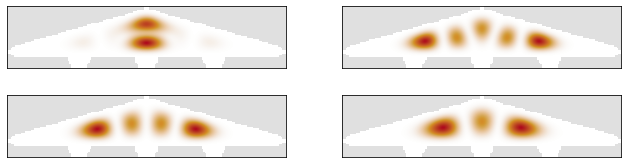

In [239]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(11, 3))
#fig.tight_layout(w_pad=1, h_pad=2)
i = 0
for axes in ax.flatten():
    kwant.plotter.density(trijunction, density(evecs[15-i]), ax=axes);
    i += 1
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.xaxis.set_ticks_position('none') 
    axes.yaxis.set_ticks_position('none') 
plt.savefig(path+'/triangle_wfs.pdf') 

# Circular cavity

In [184]:
angle = np.pi/6
geometry = {
    "l": 15*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'y',
    "angle": angle,
    "radius": 20*a,
    "w_v": 11*a,
    "A": 300*a**2
}

In [185]:
trijunction, f_params, _ = tj.finite_system(**geometry)
trijunction.eradicate_dangling()
trijunction = trijunction.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


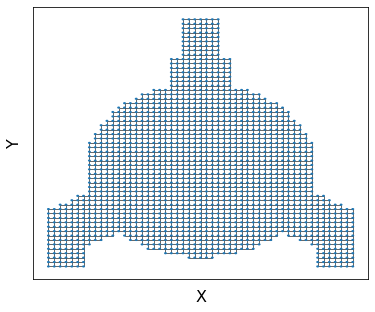

In [186]:
fig, ax = plt.subplots(figsize=(6, 5))
kwant.plot(trijunction, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/circle.pdf')

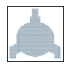

In [187]:
fig, ax = plt.subplots(figsize=(1, 1))
kwant.plot(trijunction, ax=ax)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/circle_mini.pdf')

In [178]:
eigen = sl.solver(geometries=[[trijunction, f_params]], n=20, key='mu_qd', eigenvecs=True)


def wrap(args):
    return eigen(*args)

In [244]:
params = sl.finite_coupling_parameters(index=0)[0]
params.update(mus_nw=[-2, -2, -2])

In [245]:
arg = [0, -1e-3, params]
evals, evecs = wrap(arg)

In [246]:
density = kwant.operator.Density(trijunction, np.eye(4))

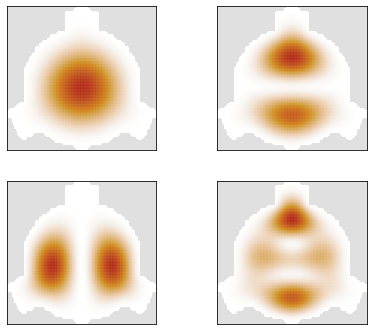

In [247]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 5))
fig.tight_layout(w_pad=1, h_pad=1)
i = 0
for axes in ax.flatten():
    kwant.plotter.density(trijunction, density(evecs[9-i]), ax=axes);
    i += 1
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.xaxis.set_ticks_position('none') 
    axes.yaxis.set_ticks_position('none') 
plt.savefig(path+'/circle_wfs.pdf')

# Rectangular strip cavity

In [169]:
distance = 15*a
geometry = {
    "l": 5*a,
    "w": 7*a,
    "a": a,
    "side": 'down',
    "shape": 'rectangle',
    "L": 45*a,
    "W": 45*a,
    "centers": [distance, -distance]
}

In [170]:
trijunction, f_params, _ = tj.finite_system(**geometry)
trijunction = trijunction.finalized()

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(


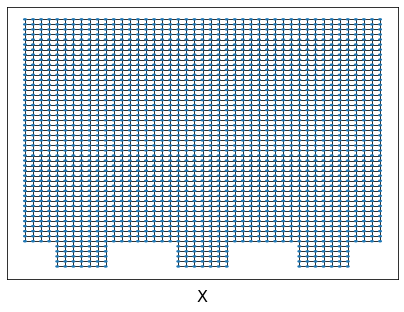

In [172]:
fig, ax = plt.subplots(figsize=(7, 5))
kwant.plot(trijunction, ax=ax)
ax.set_xlabel('X')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.savefig(path+'/rectangle.pdf')

In [251]:
eigen = sl.solver(geometries=[[trijunction, f_params]], n=20, key='mu_qd', eigenvecs=True)


def wrap(args):
    return eigen(*args)

In [252]:
params = sl.finite_coupling_parameters(index=0)[0]
params.update(mus_nw=[-2, -2, -2])

In [253]:
arg = [0, -1e-3, params]
evals, evecs = wrap(arg)

In [254]:
density = kwant.operator.Density(trijunction, np.eye(4))

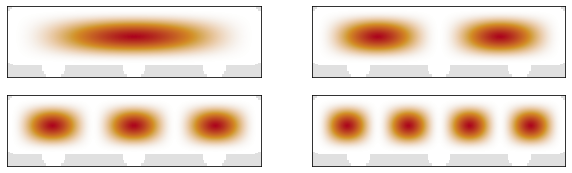

In [255]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 3))
#fig.tight_layout(w_pad=2, h_pad=2)
i = 0
for axes in ax.flatten():
    kwant.plotter.density(trijunction, density(evecs[9-i]), ax=axes);
    i += 1
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.xaxis.set_ticks_position('none') 
    axes.yaxis.set_ticks_position('none') 
plt.savefig(path+'/rectangle_wfs.pdf')